<h1>Problemas de regresión - Ejercicio 1</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3006C.102 | Inteligencia artificial avanzada para la ciencia de datos I

28 de agosto de 2023

In [ ]:
# Importar librerías y módulos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

# Ejercicio 1

**4 - Variable dependiente MR, variables independientes M, W, H y P**

**Par - Si es par, se pide el método Monte Carlo con al menos 100 particiones aleatorias.**

In [ ]:
# Importar el conjunto de datos
cd_df = pd.read_csv('/content/drive/MyDrive/z. Aprendizaje/crime_data.csv')
cd_df.head()

,State,VR,MR,M,W,H,P,S
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5


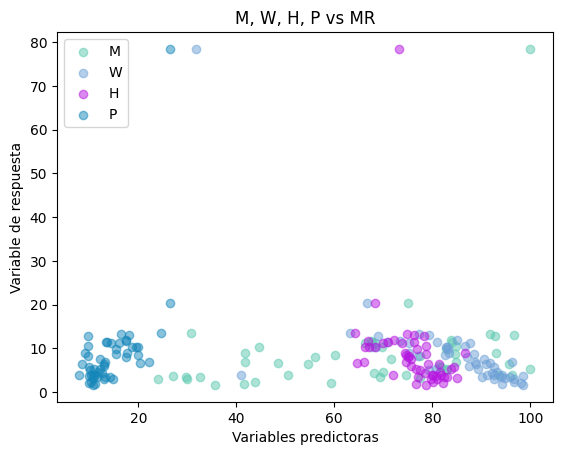

In [ ]:
# 1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

# Graficar datos
plt.scatter(cd_df['M'], cd_df['MR'], color=np.random.rand(3,), label='M', alpha=0.5)
plt.scatter(cd_df['W'], cd_df['MR'], color=np.random.rand(3,), label='W', alpha=0.5)
plt.scatter(cd_df['H'], cd_df['MR'], color=np.random.rand(3,), label='H', alpha=0.5)
plt.scatter(cd_df['P'], cd_df['MR'], color=np.random.rand(3,), label='P', alpha=0.5)

# Añadir título, etiquetas y leyenda
plt.title('M, W, H, P vs MR')
plt.xlabel('Variables predictoras')
plt.ylabel('Variable de respuesta')
plt.legend()

In [ ]:
# 2. Implementa la fórmula directa para calcular los coeficientes de un modelo de
# regresión lineal, y obtenga con ella el modelo que corresponde a la variable
# de respuesta y las variables predictoras asignadas a tu número de matrícula.

# Fórmula directa de regresión lineal para calcular los coeficientes
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

# Predecir el valor de la variable de respuesta
def predict(X, beta):
    return X @ beta

# Matriz de las variables predictoras
x = cd_df.drop(['State', 'VR',	'MR',	'S'], axis=1).to_numpy()

# Añadir una columna de 1 para calcular la constante
X = np.column_stack((np.ones(x.shape[0]), x))

# Arreglo de la variable de respuesta
y = cd_df['MR'].to_numpy()

# Ajuste del modelo
beta = fit_model(X, y)

# Impresión de resultados
print("Coeficientes del modelo: ", beta)

# Evaluar residuos
y_pred = predict(X, beta)
r = y - y_pred

# Calcular MSE, MAE and R^2
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Coeficientes del modelo:  [-39.36237505   0.08937732  -0.41776537   0.72531944   1.5371259 ]
MSE:  35.303326150777515
MAE:  3.7156277068885037
R^2:  0.6865107390948453


In [ ]:
# 3. Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R^2, MSE y MAE.

# Número de plieges
n_folds = 3

# Dividir los conjuntos de prueba y entrenamiento
kf = KFold(n_splits=n_folds, shuffle = True)

# Arreglo para guardar los valores de las pruebas
mse_cv = []
mae_cv = []
r2_cv = []

# Repetir el proceso por cada pliege
for train_index, test_index in kf.split(x):

    # Crear una regresión lineal con el conjunto de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Probar la regresión lineal con el conjunto de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

# Imprimir los resultados
print('MSE: ', np.average(mse_cv))
print("MAE: ", np.average(mae_cv))
print("R^2: ", np.average(r2_cv))

MSE:  95.40359778532631
MAE:  4.223394221204788
R^2:  -2.0301182111217333


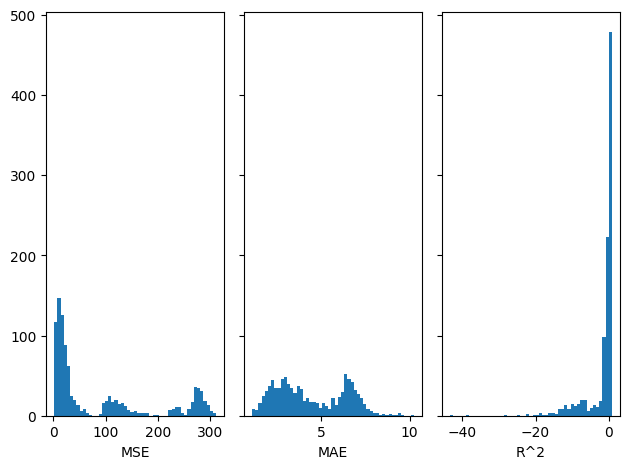

In [ ]:
# 4. Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de R^2, MSE y MAE.

# Dividir los conjuntos de prueba y entrenamiento aleatoriamente
kf = ShuffleSplit(n_splits=1000, test_size = 0.2)

# Arreglo para guardar los valores de las pruebas
mse_cv = []
mae_cv = []
r2_cv = []

# Repetir el proceso por cada división
for train_index, test_index in kf.split(x):

    # Crear una regresión lineal con el conjunto de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Probar la regresión lineal con el conjunto de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

# Crear una figura y diseño para mostrar los histogramas de R^2, MSE y MAE.
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

# Grafiar histograma de MSE
axs[0].hist(mse_cv, bins=len(x))
axs[0].set_xlabel("MSE")

# Grafiar histograma de MAE
axs[1].hist(mae_cv, bins=len(x))
axs[1].set_xlabel("MAE")

# Grafiar histograma de R^2
axs[2].hist(r2_cv, bins=len(x))
axs[2].set_xlabel("R^2")

# Mostrar figura
plt.show()

In [ ]:
# 5. Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras
# (por ejemplo, M2, W2), así como los productos entre pares de variables (por ejemplo, PxS, MxW).
# Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.

# Añadir cuadrados y productos de variables predictoras
cd_df["M^2"] = cd_df['M']**2
cd_df["W^2"] = cd_df['W']**2
cd_df["H^2"] = cd_df['H']**2
cd_df["P^2"] = cd_df['P']**2
cd_df["MxW"] = cd_df['M']*cd_df['W']
cd_df["MxH"] = cd_df['M']*cd_df['H']
cd_df["MxP"] = cd_df['M']*cd_df['P']
cd_df["WxH"] = cd_df['W']*cd_df['H']
cd_df["WxP"] = cd_df['W']*cd_df['P']
cd_df["HxP"] = cd_df['H']*cd_df['P']
cd_df.head()

,State,VR,MR,M,W,H,P,S,M^2,W^2,H^2,P^2,MxW,MxH,MxP,WxH,WxP,HxP
0,AK,761,9.0,41.8,75.2,86.6,9.1,14.3,1747.24,5655.04,7499.56,82.81,3143.36,3619.88,380.38,6512.32,684.32,788.06
1,AL,780,11.6,67.4,73.5,66.9,17.4,11.5,4542.76,5402.25,4475.61,302.76,4953.90,4509.06,1172.76,4917.15,1278.90,1164.06
2,AR,593,10.2,44.7,82.9,66.3,20.0,10.7,1998.09,6872.41,4395.69,400.00,3705.63,2963.61,894.00,5496.27,1658.00,1326.00
3,AZ,715,8.6,84.7,88.6,78.7,15.4,12.1,7174.09,7849.96,6193.69,237.16,7504.42,6665.89,1304.38,6972.82,1364.44,1211.98
4,CA,1078,13.1,96.7,79.3,76.2,18.2,12.5,9350.89,6288.49,5806.44,331.24,7668.31,7368.54,1759.94,6042.66,1443.26,1386.84


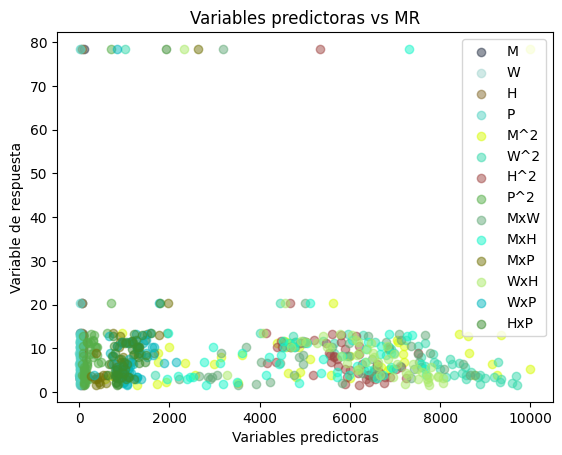

In [ ]:
# Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.

# Graficar datos
plt.scatter(cd_df['M'], cd_df['MR'], color=np.random.rand(3,), label='M', alpha=0.5)
plt.scatter(cd_df['W'], cd_df['MR'], color=np.random.rand(3,), label='W', alpha=0.5)
plt.scatter(cd_df['H'], cd_df['MR'], color=np.random.rand(3,), label='H', alpha=0.5)
plt.scatter(cd_df['P'], cd_df['MR'], color=np.random.rand(3,), label='P', alpha=0.5)
plt.scatter(cd_df['M^2'], cd_df['MR'], color=np.random.rand(3,), label='M^2', alpha=0.5)
plt.scatter(cd_df['W^2'], cd_df['MR'], color=np.random.rand(3,), label='W^2', alpha=0.5)
plt.scatter(cd_df['H^2'], cd_df['MR'], color=np.random.rand(3,), label='H^2', alpha=0.5)
plt.scatter(cd_df['P^2'], cd_df['MR'], color=np.random.rand(3,), label='P^2', alpha=0.5)
plt.scatter(cd_df['MxW'], cd_df['MR'], color=np.random.rand(3,), label='MxW', alpha=0.5)
plt.scatter(cd_df['MxH'], cd_df['MR'], color=np.random.rand(3,), label='MxH', alpha=0.5)
plt.scatter(cd_df['MxP'], cd_df['MR'], color=np.random.rand(3,), label='MxP', alpha=0.5)
plt.scatter(cd_df['WxH'], cd_df['MR'], color=np.random.rand(3,), label='WxH', alpha=0.5)
plt.scatter(cd_df['WxP'], cd_df['MR'], color=np.random.rand(3,), label='WxP', alpha=0.5)
plt.scatter(cd_df['HxP'], cd_df['MR'], color=np.random.rand(3,), label='HxP', alpha=0.5)

# Añadir título, etiquetas y leyenda
plt.title('Variables predictoras vs MR')
plt.xlabel('Variables predictoras')
plt.ylabel('Variable de respuesta')
plt.legend()

In [ ]:
# Implementa la fórmula directa para calcular los coeficientes de un modelo de
# regresión lineal, y obtenga con ella el modelo que corresponde a la variable
# de respuesta y las variables predictoras asignadas a tu número de matrícula.

# Matriz de las variables predictoras
x = cd_df.drop(['State', 'VR',	'MR',	'S'], axis=1).to_numpy()

# Añadir una columna de 1 para calcular la constante
X = np.column_stack((np.ones(x.shape[0]), x))

# Arreglo de la variable de respuesta
y = cd_df['MR'].to_numpy()

# Ajuste del modelo
beta = fit_model(X, y)

# Impresión de resultados
print("Coeficientes del modelo: ", beta)

# Evaluar residuos
y_pred = predict(X, beta)
r = y - y_pred

# Calcular MSE, MAE and R^2
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

Coeficientes del modelo:  [-3.25113064e+02  1.08687952e+00  6.54618874e+00 -8.87160312e-01
  8.45799805e+00 -1.84322460e-03 -3.21933984e-03  3.60095579e-02
 -6.07368534e-02 -9.51354005e-03  1.87395455e-03 -1.02761388e-02
 -5.84703636e-02 -9.25236807e-02  2.91934607e-02]
MSE:  3.3224814328590306
MAE:  1.4051272908453045
R^2:  0.970496767236332


In [ ]:
# Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R^2, MSE y MAE.

# Número de plieges
n_folds = 3

# Dividir los conjuntos de prueba y entrenamiento
kf = KFold(n_splits=n_folds, shuffle = True)

# Arreglo para guardar los valores de las pruebas
mse_cv = []
mae_cv = []
r2_cv = []

# Repetir el proceso por cada pliege
for train_index, test_index in kf.split(x):

    # Crear una regresión lineal con el conjunto de entrenamiento
    x_train = x[train_index, :]
    y_train = y[train_index]
    beta_cv = fit_model(x_train, y_train)

    # Probar la regresión lineal con el conjunto de prueba
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = predict(x_test, beta_cv)

    # Calcular los valores de MSE, MAE y R^2 y añadir a sus respectivos arreglos
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)
    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)
    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

# Imprimir los resultados
print('MSE: ', np.average(mse_cv))
print("MAE: ", np.average(mae_cv))
print("R^2: ", np.average(r2_cv))

MSE:  72.71049250968615
MAE:  3.3129630211681977
R^2:  -1.5106608918704296


(1e-11, 100000000000.0, -6.104963184528848, 7.600087360481142)

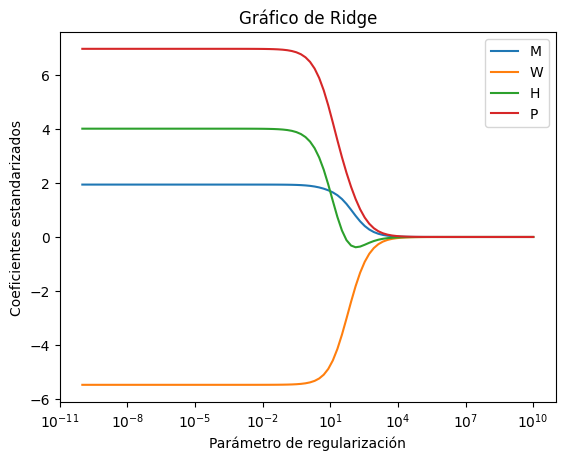

In [ ]:
# Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge
# para el conjunto de datos original (sin las variables elevadas al cuadrado).

# Matriz de las variables predictoras
x = cd_df.drop(['State', 'VR',	'MR',	'S', 'M^2', 'W^2', 'H^2', 'P^2', 'MxW', 'MxH', 'MxP', 'WxH', 'WxP', 'HxP'], axis=1).to_numpy()

# Arreglo de la variable de respuesta
y = cd_df['MR'].to_numpy()

# Estandarizar los datos de las variables predictoras
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Definir un rango de valores para alpha
alphas = np.logspace(-10, 10, 100)

# Arreglo para almacenar los coeficientes de cada alpha
coefs = []

# Hacer regresión de Ridge para cada valor de alpha y almacenarlos en el arreglo
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

# Graficar información y añadir título, etiquetas y leyenda
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Coeficientes estandarizados')
plt.title('Gráfico de Ridge');
plt.legend(['M', 'W', 'H', 'P'])
plt.axis('tight')

(1e-11, 100000000000.0, -6.104963184466671, 7.600087360110438)

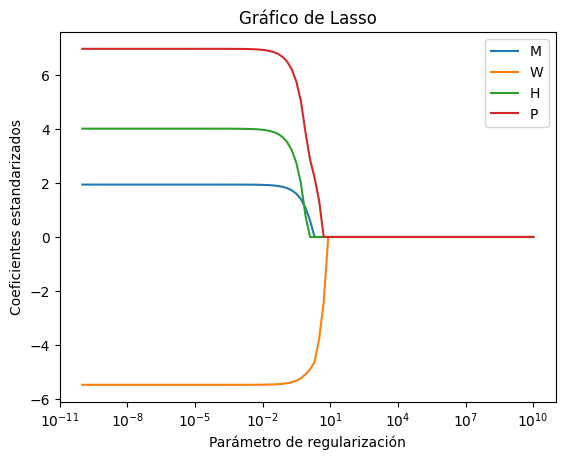

In [ ]:
# Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original
# (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?
# FUENTE: https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

# Arreglo para almacenar los coeficientes de cada alpha
coefs = []

# Hacer regresión de Ridge para cada valor de alpha y almacenarlos en el arreglo
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)

# Graficar información y añadir título, etiquetas y leyenda
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Parámetro de regularización')
plt.ylabel('Coeficientes estandarizados')
plt.title('Gráfico de Lasso');
plt.legend(['M', 'W', 'H', 'P'])
plt.axis('tight')

**¿Qué variables son más relevantes para el modelo?**

De acuerdo al gráfico de Lasso, mientras que todas las variables son importantes para el modelo las más relevantes W y P.

###8. Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:

**1. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

No considero que el modelo de regresión lineal sea efectivo para modelar los datos del problema ya que los valores de MSE y MAE son muy altos para los valores reales de la variable de respuesta. El R^2 es casi 0.7 lo cual es relativamente bueno pero creo que considerando lo anterior no se puede decir que el modelo sea efectivo.

**2. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.**

Observo una variabilidad importante en los valores de MSE y R^2 al aplicar validación cruzada. Después de varias ejecuciones del código, los valores de MSE cambian de 35 a valores entre 35 y 140, frecuentando valores mayores a 100 (aproximadamente el triple). Los valores de R^2 cambian de 0.68 a valores negativos o menores a 0.4 pero nunca se acercan a 0.68. Por su parte, los valores de MAE tienen una variabilidad menos importante, cambiando de 3.7 a valores entre 3 y 6 lo cual, en comparación, es mucho menor.

**3. ¿Qué modelo es mejor para los datos de criminalidad, el lineal o el cuadrático? ¿Por qué?**

Ya que los valores de MSE y MAE disminuyen de 35.3 a 3.3 y de 3.7 a 1.4 respectivamente y el valor de R^2 incrementa de 0.68 a 0.97, se podría decir que el modelo cuadrático es mejor para los datos de criminalidad.

**4. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

Según Ridge y Lasso, a pesar de que todas las variables son importantes las más relevantes son W y P.

**5. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

Las variables predictoras W, H y P al graficarse están relativamente bien separadas ya que muy pocas se encuentran fuera de un rango de valores que visualmente se identifica fácilmente. Por su parte, la variable predictora M tiene valores muy dispersados. Adicionalmente, las variables W y H frecuentemente tienen valores cercanos. Por último, los valores de MR generalmente son menores o cercanos a 10, excepto para los estados de LA y DC (Los Ángeles y Washington D.C.).